notebook for homework 2 of Course ADS2023.
Group: Meyssam Rostamzadeh and Ali Sarmadi.


In [1]:
from google.colab import files
import pandas as pd
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
sns.set(color_codes=True)

The dataset we choosed is [uci-air-quality](https://data.world/uci/air-quality) it's available via link and also in the .rar archive provided in Homework solution.

In [2]:
uploaded = files.upload()

Saving AirQualityUCI.csv to AirQualityUCI.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['AirQualityUCI.csv']),  sep=';')
print(df.shape)

(9471, 17)


beside date and time, there are 13 parameters reported in each row.
so there would be 15 columns total.
but there is 17 columns. lets check:

In [4]:
df.head(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


there is two NaN columns in the dataframe because of two redundunt semicolone in the CSV file. so we can delete them:

In [5]:
df = df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1)

checking solution and also checking that is any null values present or not:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


it seems that there are 9471 entries and 9357 not-null value so there "is" null values actually. but it's a little wired since all columns have exact same number of values. maybe there are some "totally null" rows. check:

In [7]:
df[df['Date'].isnull()]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


as you can see there are 114 "totall null" rows(9471-9357=114).
deleting:

In [13]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


now there isn't any missing value and except date and time, all other columns are numerical. now let's get some insight of the dataset:


In [14]:
df.Date.describe()

count           9357
unique           391
top       21/09/2004
freq              24
Name: Date, dtype: object

In [15]:
df.Time.describe()

count         9357
unique          24
top       18.00.00
freq           390
Name: Time, dtype: object

so the dataset consist of measured value of 13 sensors over 391 days period, one sample per hour.

we'll extract column names for later use:

In [19]:
col_list_total = list(df.columns.values)
col_list_plus_time = list(df.columns.values)
col_list = list(df.columns.values)
del col_list_plus_time[0:1]
del col_list[0:2]

In [22]:
col_list

['CO(GT)',
 'PT08.S1(CO)',
 'NMHC(GT)',
 'C6H6(GT)',
 'PT08.S2(NMHC)',
 'NOx(GT)',
 'PT08.S3(NOx)',
 'NO2(GT)',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'T',
 'RH',
 'AH']

 let's check some sensor values:

In [16]:
df['CO(GT)'].describe()

count    9357.000000
mean      -34.207524
std        77.657170
min      -200.000000
25%         0.600000
50%         1.500000
75%         2.600000
max        11.900000
Name: CO(GT), dtype: float64

In [17]:
df['CO(GT)'].value_counts()

-200.0    1683
 1.0       305
 1.4       279
 1.6       275
 1.5       273
          ... 
 9.9         1
 7.6         1
 9.3         1
 7.0         1
 8.5         1
Name: CO(GT), Length: 97, dtype: int64

there are 1683 sample with -200 value and all others fall in range 0 to 12. it seems that -200 is somthing like null here. we've search the internet and found that the output value of all sensors are always a positive number and -200 cause by pull down resistor on the inputs of datalogger which means "sensor disconnected". so best way is to change -200 to it's previous value since the actual value of measured substance in the air doesn't change rapidly:

In [23]:
# changing -200 to NaN for all sensors
for col in col_list:
  df[col] = df[col].apply(lambda x: x if x != -200 else np.NaN)

In [24]:
# checking for one sensor:
df[(df[col_list[12]].isnull())].head(3)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
524,01/04/2004,14.00.00,1.7,NaN,222.0,NaN,NaN,99.0,NaN,72.0,NaN,NaN,NaN,NaN,NaN
525,01/04/2004,15.00.00,1.9,NaN,197.0,NaN,NaN,108.0,NaN,81.0,NaN,NaN,NaN,NaN,NaN
526,01/04/2004,16.00.00,2.3,NaN,319.0,NaN,NaN,131.0,NaN,93.0,NaN,NaN,NaN,NaN,NaN


In [25]:
# filling with previous values:
for col in col_list:
  df[col].fillna(method='bfill', inplace=True)

In [26]:
# checking if NaN values really gone:
df[(df[col_list[12]].isnull())]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH


ok no missing value anymore.

In [54]:
df[df.duplicated()].shape

(0, 15)

this dataset couldn't have any duplicate because each row would be different with next/prev row in Time column at least. let's just check sensors values:

In [57]:
df[df[col_list].duplicated()].shape

(33, 15)

so there are 33 duplicates.let's see these 33 rows:

In [58]:
df[df[col_list].duplicated()]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
1826,25/05/2004,20.00.00,0.330508,0.470926,NaN,0.630503,0.760786,0.125931,0.264295,0.396450,0.411871,0.602520,0.479570,0.333333,0.322191
1827,25/05/2004,21.00.00,0.330508,0.470926,NaN,0.630503,0.760786,0.125931,0.264295,0.396450,0.411871,0.602520,0.479570,0.333333,0.322191
1828,25/05/2004,22.00.00,0.330508,0.470926,NaN,0.630503,0.760786,0.125931,0.264295,0.396450,0.411871,0.602520,0.479570,0.333333,0.322191
1829,25/05/2004,23.00.00,0.330508,0.470926,NaN,0.630503,0.760786,0.125931,0.264295,0.396450,0.411871,0.602520,0.479570,0.333333,0.322191
1830,26/05/2004,00.00.00,0.330508,0.470926,NaN,0.630503,0.760786,0.125931,0.264295,0.396450,0.411871,0.602520,0.479570,0.333333,0.322191
1831,26/05/2004,01.00.00,0.330508,0.470926,NaN,0.630503,0.760786,0.125931,0.264295,0.396450,0.411871,0.602520,0.479570,0.333333,0.322191
1832,26/05/2004,02.00.00,0.330508,0.470926,NaN,0.630503,0.760786,0.125931,0.264295,0.396450,0.411871,0.602520,0.479570,0.333333,0.322191
1833,26/05/2004,03.00.00,0.330508,0.470926,NaN,0.630503,0.760786,0.125931,0.264295,0.396450,0.411871,0.602520,0.479570,0.333333,0.322191
1834,26/05/2004,04.00.00,0.330508,0.470926,NaN,0.630503,0.760786,0.125931,0.264295,0.396450,0.411871,0.602520,0.479570,0.333333,0.322191
1835,26/05/2004,05.00.00,0.330508,0.470926,NaN,0.630503,0.760786,0.125931,0.264295,0.396450,0.411871,0.602520,0.479570,0.333333,0.322191


as you can see, most of these records are taken during night and changes of contaminatin during night is small. so it's normal that during about 400 night there would be couple of hours that sensor's output didn't change. note that these values are float, but actual sensor output are discrete. so we don't delete these duplicate as they are meaningful.

 let's see value of some sensors:

<Axes: title={'center': 'RH'}>

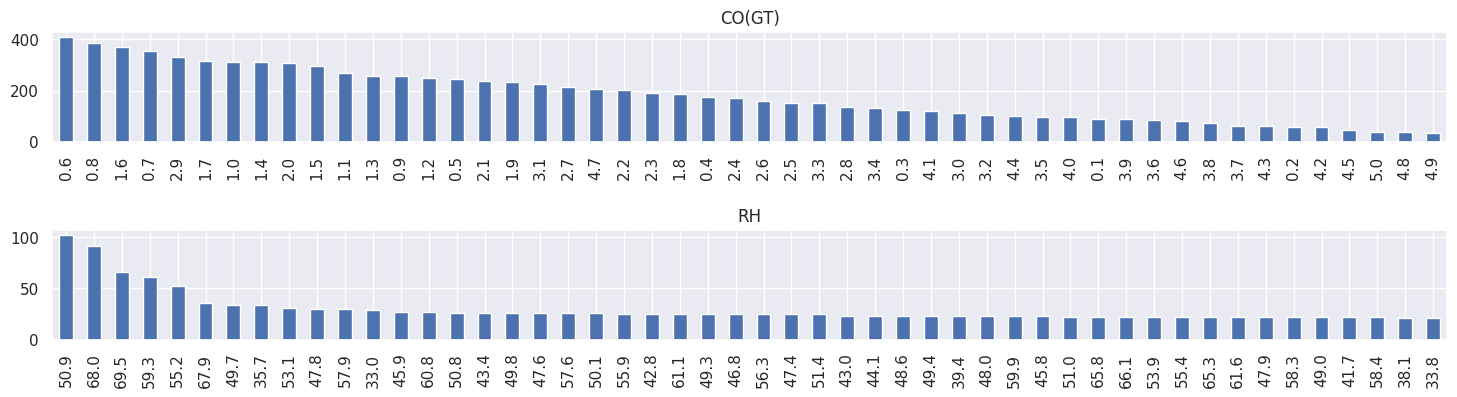

In [48]:
fig, axes = plt.subplots(nrows=2, ncols=1)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1,
                    wspace=0.4,
                    hspace=0.8)
df[col_list[0]].value_counts().head(50).plot.bar(figsize=(18, 4),title = col_list[0],ax=axes[0])
df[col_list[11]].value_counts().head(50).plot.bar(figsize=(18, 4),title = col_list[11],ax=axes[1])


it's shows what values have more occurrence than others. no valuabe data since we don't now what it means when value is 3 compared to when it is 300! let's see changes in value in different hours of day(mean value accross all 391 days):

<Axes: title={'center': 'col_list'}, xlabel='Time'>

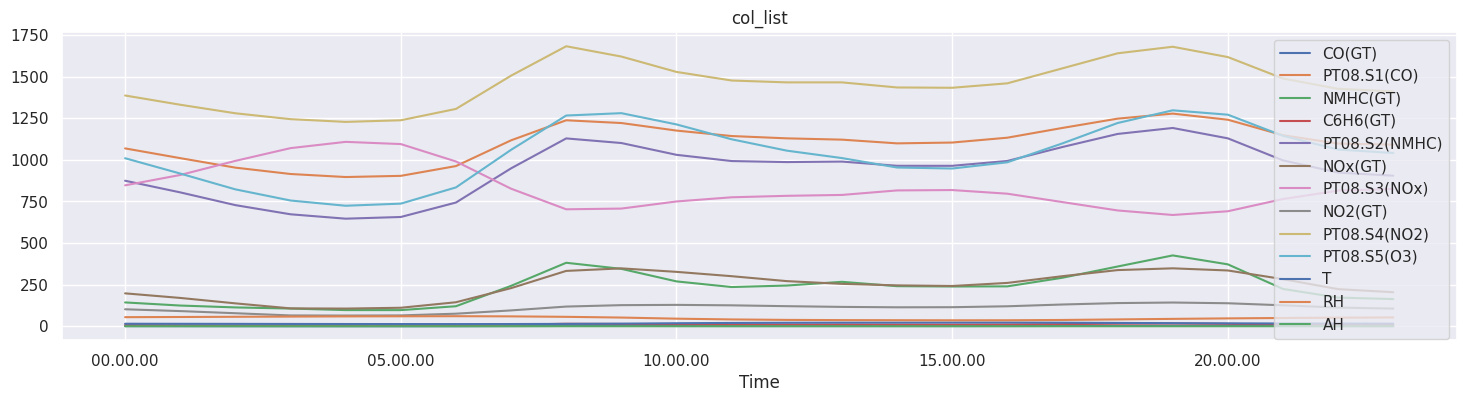

In [33]:
df[col_list_plus_time].groupby(['Time']).mean().plot(figsize=(18, 4),title = 'col_list')

now we can see a reasonable changes in values in different hours of day. if we normalize sensor values, change should become more visible. we use min max scaler since original values that come out of sensors are like this(they never produce negative value):


In [50]:
scaler = MinMaxScaler()
df[col_list] = scaler.fit_transform(df[col_list])
df[col_list].describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,1231.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,0.176187,0.327630,0.189256,0.158301,0.305154,0.163245,0.216339,0.319081,0.405838,0.353422,0.431171,0.507740,0.409109
std,0.124660,0.157885,0.173761,0.118491,0.147009,0.141356,0.109222,0.140932,0.153381,0.177756,0.188749,0.216539,0.195518
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.076271,0.208184,0.040609,0.067610,0.191699,0.062965,0.140195,0.213018,0.306205,0.224153,0.290323,0.340881,0.270097
50%,0.152542,0.302943,0.124365,0.128931,0.288913,0.120515,0.203727,0.307692,0.407374,0.326672,0.419355,0.515723,0.395152
75%,0.245763,0.427136,0.352792,0.223270,0.405789,0.212593,0.272342,0.402367,0.499550,0.465248,0.559140,0.675472,0.548307
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


visualizing again:

<Axes: title={'center': 'col_list'}, xlabel='Time'>

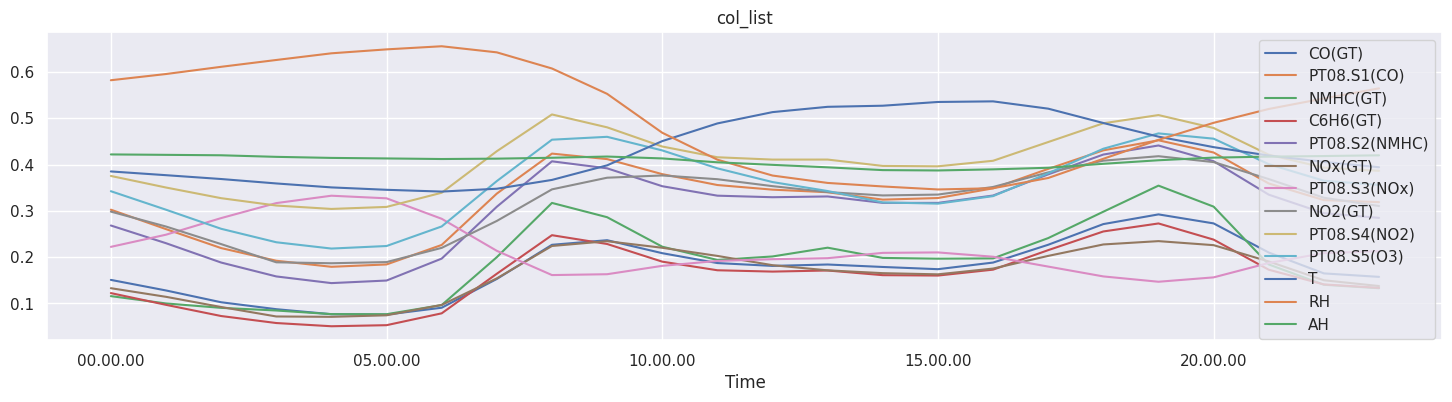

In [51]:
df[col_list_plus_time].groupby(['Time']).mean().plot(figsize=(18, 4),title = 'col_list')

most of gases these sensors measured are dangerous or harmfull gases. as writed in dataset description, the module was mounted in a roadway and around 8 a.m and 6-7 pm (rush hours) amount of gases in the air increases. also during the day there is more contaminatin in the air than nights. that make sense!

let's look at correlation matrix:

In [53]:
df.corr().style.background_gradient(cmap='YlOrRd')

<ipython-input-53-8160ebbc7b00>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap='YlOrRd')


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.749882,0.837857,0.786693,0.779185,0.778469,-0.618746,0.660310,0.549938,0.727845,0.040164,0.057730,0.079035
PT08.S1(CO),0.749882,1.000000,0.670376,0.873365,0.888283,0.635560,-0.777750,0.600477,0.662124,0.902369,0.025554,0.112759,0.104307
NMHC(GT),0.837857,0.670376,1.000000,0.665262,0.654694,0.783980,-0.588680,0.710431,0.659462,0.593857,0.302301,-0.179441,0.178129
C6H6(GT),0.786693,0.873365,0.665262,1.000000,0.981778,0.622739,-0.721795,0.555864,0.745159,0.851389,0.187815,-0.069203,0.147080
PT08.S2(NMHC),0.779185,0.888283,0.654694,0.981778,1.000000,0.618171,-0.787787,0.588266,0.759808,0.870473,0.227390,-0.094304,0.165582
NOx(GT),0.778469,0.635560,0.783980,0.622739,0.618171,1.000000,-0.599991,0.774805,0.207077,0.690107,-0.236985,0.214948,-0.112785
PT08.S3(NOx),-0.618746,-0.777750,-0.588680,-0.721795,-0.787787,-0.599991,1.000000,-0.603942,-0.527495,-0.796219,-0.121843,-0.064873,-0.209072
NO2(GT),0.660310,0.600477,0.710431,0.555864,0.588266,0.774805,-0.603942,1.000000,0.138934,0.655578,-0.182211,-0.069680,-0.305178
PT08.S4(NO2),0.549938,0.662124,0.659462,0.745159,0.759808,0.207077,-0.527495,0.138934,1.000000,0.563346,0.558723,-0.034656,0.626252
PT08.S5(O3),0.727845,0.902369,0.593857,0.851389,0.870473,0.690107,-0.796219,0.655578,0.563346,1.000000,-0.052566,0.122545,0.036286


it seems that sensors can be categorized in two category. all sensors except [PT08.S3(NOx)],[T],[RH],[AH] has good correlation with each other and these 4 also have correlation within themselves. it maybe related to the source of generation of these type of gases.